# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

## Getting Data

In [2]:
df = pd.read_csv("amazon_1.csv").drop("Unnamed: 0",axis=1)
# df = pd.read_csv("amazon_2.csv").drop("Unnamed: 0",axis=1)
# df = pd.read_csv("amazon_3.csv").drop("Unnamed: 0",axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563063 entries, 0 to 563062
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      563063 non-null  object
 1   asin            563063 non-null  object
 2   reviewerName    554713 non-null  object
 3   helpful         563063 non-null  object
 4   reviewText      562729 non-null  object
 5   overall         563063 non-null  int64 
 6   summary         563058 non-null  object
 7   unixReviewTime  563063 non-null  int64 
 8   reviewTime      563063 non-null  object
dtypes: int64(2), object(7)
memory usage: 38.7+ MB


In [4]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,APC67SS58SV87,B001GCQ3KM,bloodshot,"[0, 0]",I narrowed my choices down to this and an iPod...,5,Great mp3 player.,1239840000,"04 16, 2009"
1,A34G4GSIYY4JJ3,B00002EQCW,"Jay Citizen ""JCitizen""","[0, 0]",These have been staple for years. You can't ge...,5,A tried at true solution...,1359417600,"01 29, 2013"
2,A2FBQCIU4KSYPZ,B000A6PPOK,Meniscus,"[0, 0]","The ergonomic styling works well, after only a...",3,Good but could be better.,1192406400,"10 15, 2007"
3,A2LB20XRW6SY0W,B008EWNVI4,"Jackson65 ""Jack's Woodworking""","[1, 2]",We have a Panasonic Vierra that is a great TV ...,5,Great TV sound.,1380499200,"09 30, 2013"
4,A9C5WOVLLNC43,B003BEDQR6,T. C. Fowler,"[0, 0]",When I bought this I had high expectations but...,3,It's an OK system,1300060800,"03 14, 2011"


In [5]:
df.drop(["reviewerID","asin","reviewerName","helpful","summary","unixReviewTime","reviewTime"],axis=1,inplace=True)

In [6]:
df.head()

,reviewText,overall
0,I narrowed my choices down to this and an iPod...,5
1,These have been staple for years. You can't ge...,5
2,"The ergonomic styling works well, after only a...",3
3,We have a Panasonic Vierra that is a great TV ...,5
4,When I bought this I had high expectations but...,3


We will work on review's ratings so we only need reviewText and overall columns so we will drop other columns. And get rid of unnecessary weight. 

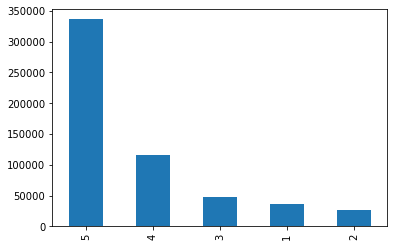

In [7]:
df.overall.value_counts().plot.bar();

## NLP Pre-Processing
Let's get rid of punctuation marks and whitespaces. And convert all the characters into lower case to make our words case insensitive.

In [8]:
df["reviewText"] = df["reviewText"].str.lower()
df["reviewText"] = df["reviewText"].str.replace("[^\w\s]","")
df["reviewText"] = df["reviewText"].str.replace("\d+","")
df["reviewText"] = df["reviewText"].str.replace("\n"," ").replace("\r","")

In [9]:
df.loc[df["overall"]==3, "sentiment"] = "neutral"
df.loc[df["overall"]<3, "sentiment"] = "negative"
df.loc[df["overall"]>3, "sentiment"] = "positive"

In [10]:
df.head()

,reviewText,overall,sentiment
0,i narrowed my choices down to this and an ipod...,5,positive
1,these have been staple for years you cant get ...,5,positive
2,the ergonomic styling works well after only a ...,3,neutral
3,we have a panasonic vierra that is a great tv ...,5,positive
4,when i bought this i had high expectations but...,3,neutral


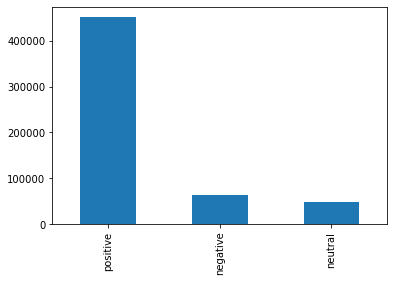

In [11]:
df["sentiment"].value_counts().plot.bar();

## Missing Reviews
There are some people who didn't write any review. So we will drop those rows.

In [12]:
df.shape

(563063, 3)

In [13]:
df.dropna(how="any", axis=0, inplace=True)

In [14]:
df.shape

(562729, 3)

## Stemming
We should take the root of the words. So we don't come across same word more than once.

In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmatize']=[[lemmatizer.lemmatize(i) for i in words] for words in df['reviewText'].values]

## Polarity & Subjectivity

In [16]:
from textblob import TextBlob
df[["polarity","subjectivity"]]=df["reviewText"].apply(lambda t:pd.Series(TextBlob(t).sentiment))

## Tokenization

In [17]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(str(i)) for i in df['reviewText'].values]

# Saving Results
Because I don't wanna run these codes again(They took so much time!), I will save the dataframe and use it later.

In [18]:
df.head(5)

,reviewText,overall,sentiment,lemmatize,polarity,subjectivity,tokenized
0,i narrowed my choices down to this and an ipod...,5,positive,"[i, , n, a, r, r, o, w, e, d, , m, y, , c, ...",0.079630,0.320370,"[i, narrowed, my, choices, down, to, this, and..."
1,these have been staple for years you cant get ...,5,positive,"[t, h, e, s, e, , h, a, v, e, , b, e, e, n, ...",0.179636,0.289455,"[these, have, been, staple, for, years, you, c..."
2,the ergonomic styling works well after only a ...,3,neutral,"[t, h, e, , e, r, g, o, n, o, m, i, c, , s, ...",0.099515,0.425154,"[the, ergonomic, styling, works, well, after, ..."
3,we have a panasonic vierra that is a great tv ...,5,positive,"[w, e, , h, a, v, e, , a, , p, a, n, a, s, ...",0.135185,0.528704,"[we, have, a, panasonic, vierra, that, is, a, ..."
4,when i bought this i had high expectations but...,3,neutral,"[w, h, e, n, , i, , b, o, u, g, h, t, , t, ...",0.209278,0.438778,"[when, i, bought, this, i, had, high, expectat..."


In [19]:
df.to_csv("result_df.csv")